In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = 'transfers-master/data/'

In [5]:
cols = ['club_name', 'player_name', 'age', 'position', 'club_involved_name', 'fee', 'transfer_movement', 'fee_cleaned', 'league_name', 'year', 'season']

data = pd.DataFrame(columns = cols)
for i in range(2010,2020):
    df = pd.read_csv(path + str(i) + '/english_premier_league.csv')
    for index,row in df.iterrows():
        if 'loan' not in row['fee'] or 'Loan' not in row['fee']:
            data.loc[len(data)] = row

            
print(len(data))
    
    

9021


In [30]:
c_data = data.replace('Forward', 'Centre-Forward')
c_data = c_data.replace('Second Striker', 'Attacking Midfield')
c_data = c_data.replace('Midfielder', 'Central Midfield')
c_data = c_data.replace('Defender', 'Centre-Back')
c_data = c_data.replace('Right Midfield', 'Right Winger')
c_data = c_data.replace('Left Midfield', 'Left Winger')

positions = c_data['position'].unique()
seasons = c_data['season'].unique()
print(positions, seasons)

['Centre-Back' 'Right Winger' 'Centre-Forward' 'Goalkeeper'
 'Central Midfield' 'Defensive Midfield' 'Left Winger'
 'Attacking Midfield' 'Left-Back' 'Right-Back'] ['2010/2011' '2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016'
 '2016/2017' '2017/2018' '2018/2019' '2019/2020']


In [46]:
position_spend = pd.DataFrame(columns = ['position', 'season', 'mean_spend'])
for position in positions:
    for season in seasons:
        p_data = c_data.loc[(c_data['position'] == position) & (c_data['season'] == season) & (c_data['transfer_movement'] == 'in') & (c_data['fee_cleaned'] > 10)]

        print(position, season, p_data['fee_cleaned'].mean())
        pdata = {}
        pdata['position'] = position
        pdata['season'] = season
        pdata['mean_spend'] = p_data['fee_cleaned'].mean()
        position_spend.loc[len(position_spend)] = pdata
            
        

Centre-Back 2010/2011 15.0
Centre-Back 2011/2012 12.780000000000001
Centre-Back 2012/2013 12.81
Centre-Back 2013/2014 15.120000000000001
Centre-Back 2014/2015 19.28
Centre-Back 2015/2016 15.917142857142858
Centre-Back 2016/2017 29.294999999999998
Centre-Back 2017/2018 30.094166666666656
Centre-Back 2018/2019 17.28090909090909
Centre-Back 2019/2020 31.401999999999997
Right Winger 2010/2011 nan
Right Winger 2011/2012 nan
Right Winger 2012/2013 10.756666666666666
Right Winger 2013/2014 24.599999999999998
Right Winger 2014/2015 39.300000000000004
Right Winger 2015/2016 22.97333333333333
Right Winger 2016/2017 13.68
Right Winger 2017/2018 25.41
Right Winger 2018/2019 26.156249999999996
Right Winger 2019/2020 32.346
Centre-Forward 2010/2011 29.571428571428577
Centre-Forward 2011/2012 17.6175
Centre-Forward 2012/2013 16.4025
Centre-Forward 2013/2014 18.61714285714286
Centre-Forward 2014/2015 18.492727272727272
Centre-Forward 2015/2016 21.43
Centre-Forward 2016/2017 21.887999999999998
Centre-F

In [20]:
c_position = position_spend.replace('Nan', 0)
c_position = c_position.replace('Nan', 0)



sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(x='season', y='mean_spend', hue='position', data = c_position)
g.set_title('Mean Spend per position (£m) in PL, 2010-2019')


NameError: name 'position_spend' is not defined

Text(0.5, 1.0, 'Mean Spend per position (£m) in PL, 2010-2019, Defenders')

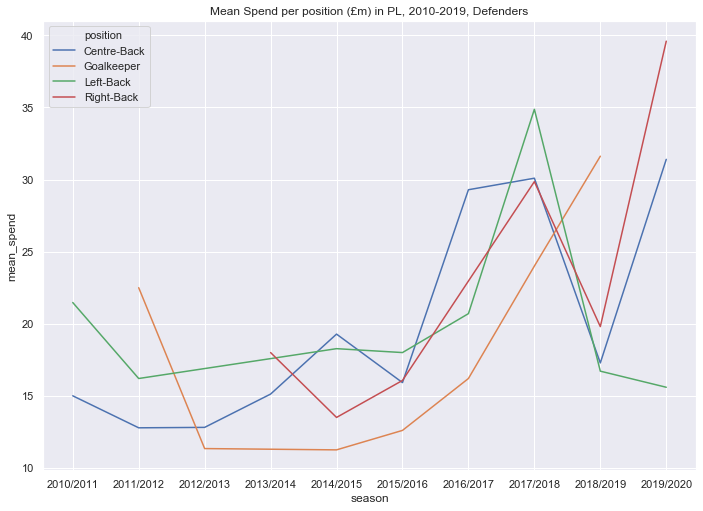

In [188]:
def_pos = ['Centre-Back','Goalkeeper',
 'Left-Back', 'Right-Back']

g = sns.lineplot(x='season', y='mean_spend', hue='position', data = c_position.loc[c_position['position'].isin(def_pos)])
g.set_title('Mean Spend per position (£m) in PL, 2010-2019, Defenders')

In [17]:
age_spend = pd.DataFrame(columns = ['age', 'spend', 'season'])
for season in ['2010/2011','2014/2015', '2019/2020']:
    for age in data['age'].unique():
        adata = data.loc[(data['age'] == age) & (data['fee_cleaned'] > 1) & (data['season'] == season)]['fee_cleaned'].sum()
        age_data = {}
        age_data['age'] = age
        age_data['spend'] = adata
        age_data['season'] = season
        age_spend.loc[len(age_spend)] = age_data

age_spend = age_spend.dropna().sort_values(by=['age'])
age_spend = age_spend.loc[age_spend['age'] < 35]
print(age_spend)

     age   spend     season
23  16.0    0.00  2010/2011
53  16.0    0.00  2014/2015
83  16.0    0.00  2019/2020
16  17.0    8.10  2010/2011
76  17.0    1.71  2019/2020
46  17.0    3.61  2014/2015
32  18.0   73.47  2014/2015
62  18.0   47.88  2019/2020
2   18.0    7.88  2010/2011
7   19.0    3.42  2010/2011
37  19.0   52.06  2014/2015
67  19.0   76.32  2019/2020
6   20.0   57.06  2010/2011
36  20.0   53.88  2014/2015
66  20.0   27.00  2019/2020
35  21.0  117.69  2014/2015
65  21.0  279.18  2019/2020
5   21.0   29.25  2010/2011
70  22.0  305.15  2019/2020
40  22.0   72.14  2014/2015
10  22.0   91.53  2010/2011
38  23.0  124.96  2014/2015
68  23.0  287.78  2019/2020
8   23.0  105.96  2010/2011
0   24.0  184.85  2010/2011
60  24.0  167.45  2019/2020
30  24.0  261.65  2014/2015
42  25.0  235.92  2014/2015
12  25.0   32.04  2010/2011
72  25.0  270.36  2019/2020
63  26.0  303.30  2019/2020
3   26.0  210.47  2010/2011
33  26.0  279.13  2014/2015
39  27.0  254.63  2014/2015
9   27.0   89.82  20

In [18]:
for season in ['2014/2015', '2019/2020']:
    season_total = age_spend.loc[age_spend['season'] == season]['spend'].sum()
    for age in age_spend['age'].unique():
        spend = age_spend.loc[age_spend['season'] == season]

Text(0.5, 1.0, 'Total spend per age (£m) in PL, 2014/2015 and 2019/2020')

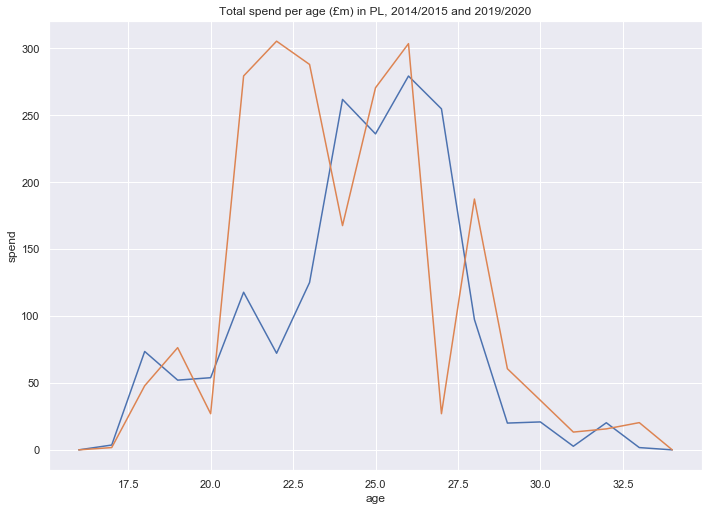

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(x = 'age', y= 'spend', data= age_spend.loc[age_spend['season'] == '2014/2015'])
g = sns.lineplot(x = 'age', y= 'spend', data= age_spend.loc[age_spend['season'] == '2019/2020'])
g.set_title('Total spend per age (£m) in PL, 2014/2015 and 2019/2020')

Text(0.5, 1.0, 'Average age of transferred player (years), Premier League, 2010-2020')

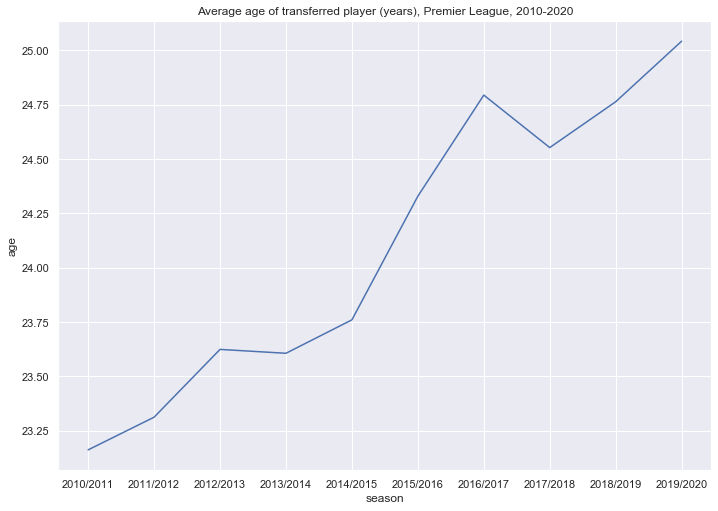

In [25]:

sns.set(rc={'figure.figsize':(11.7,8.27)})


mean_age = pd.DataFrame(data.groupby('season')['age'].mean())
mean_age['season'] = mean_age.index
g = sns.lineplot(x = 'season', y = 'age', data = mean_age)
g.set_title('Average age of transferred player (years), Premier League, 2010-2020')